In [1]:
%run numericODE.ipynb
isShow = True

In [2]:
def f(y, args):
    mu = args[0]
    return array([\
        y[1],\
        -mu*(y[0]**2 - 1)*y[1] - y[0],\
    ], dtype=float64)

In [3]:
# mus = (0., 0.5, 1., 2., 5., 10., 20., 50.)
mus = (0., 1., 5., 10., 20., 50., 100., 150.)
tol = 1.e-3
xk, h = 100, 0.01
res_fix = {}
res_steps = {}

## RK4

In [4]:
p = 4
def discrepancy(mu, y):
    return mu**5*(-y[0]**10*y[1]/120 + y[0]**8*y[1]/24 -\
        y[0]**6*y[1]/12 + y[0]**4*y[1]/12 - y[0]**2*y[1]/24 +\
        y[1]/120) + mu**4*(-y[0]**9/120 + y[0]**7*y[1]**2/60 +\
        y[0]**7/30 - y[0]**5*y[1]**2/20 - y[0]**5/20 +\
        y[0]**3*y[1]**2/20 + y[0]**3/30 - y[0]*y[1]**2/60 -\
        y[0]/120) + mu**3*(y[0]**4*y[1]**3/16 - y[0]**4*y[1]/30 -\
        11*y[0]**2*y[1]**3/120 + y[0]**2*y[1]/15 + 7*y[1]**3/240 -\
        y[1]/30) + mu**2*(-y[0]**5/120 + 5*y[0]**3*y[1]**2/48 -\
        y[0]**3/60 - y[0]*y[1]**4/24 - y[0]*y[1]**2/48 + y[0]/40) +\
        mu*(7*y[0]**2*y[1]/240 - y[1]**3/40 + y[1]/40) - y[0]/120

In [5]:
x = arange(0., xk, h, dtype=float64)
res = []
for mu in mus:
    y = empty((len(x), 2), dtype=float64)
    y[0] = 0., 1.
    for i in range(1, len(x)):
        y[i] = RK4(f, [mu], y[i-1], h)
        if abs(y[i][0]) >= 5.:
            break
    res.append((mu, i, y))
    print(mu, "%.2e" % (h**p*mu**(p+1)))
for mu, i, y in res:
    res_fix["RK4", mu] = i, h**p*mu**(p+1), max(abs(y[:i, 0]))

0.0 0.00e+00
1.0 1.00e-08
5.0 3.13e-05
10.0 1.00e-03
20.0 3.20e-02
50.0 3.12e+00
100.0 1.00e+02
150.0 7.59e+02


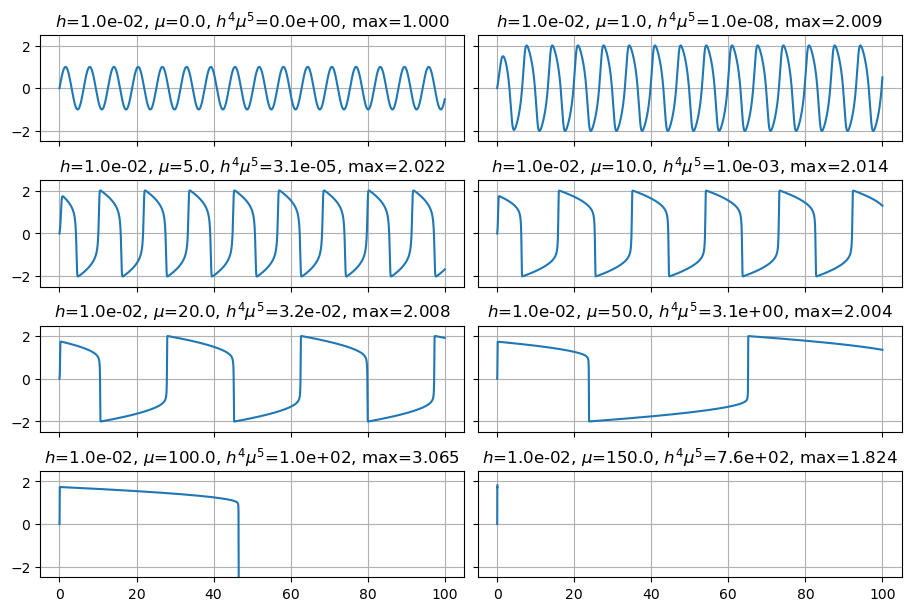

In [6]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=True)
for k in range(rows):
    for j in range(2):
        mu, i, y = res[2*k+j]
        axes[k, j].set_title(r"$h$=%.1e, $\mu$=%.1f, $h^%d\mu^%d$=%.1e, max=%.3f" %
                (h, mu, p, p+1, h**p*mu**(p+1), max(abs(y[:i, 0]))))
        axes[k, j].plot(x[:i], y[:i, 0])
        axes[k, j].grid()
        axes[k, j].set_ylim([-2.5, 2.5])
show() if isShow else savefig('figVanderPolRK41.pdf')
close()

In [7]:
print("step =", xk//h)
res = []
for mu in mus:
    x, y = 0., empty(2, dtype=float64)
    y[:] = 0., 1.
    d, h1 = discrepancy(mu, y), h
    r = [(x, y[0], y[1], h1, d)]
    i = 0
    while x < xk:
        x += h1
        y = RK4(f, [mu], y, h1)
        if abs(y[0]) >= 3.:
            break
        d = discrepancy(mu, y)
        h1 = min(h, (tol/(1 + abs(d)))**(1./p))
        r.append((x, y[0], y[1], h1, d))
        i += 1
    res.append((mu, r))
    print(mu)
for mu, r in res:
    res_steps["RK4", mu] = len(r), max(abs(s[1]) for s in r)

step = 9999.0
0.0
1.0
5.0
10.0
20.0
50.0
100.0
150.0


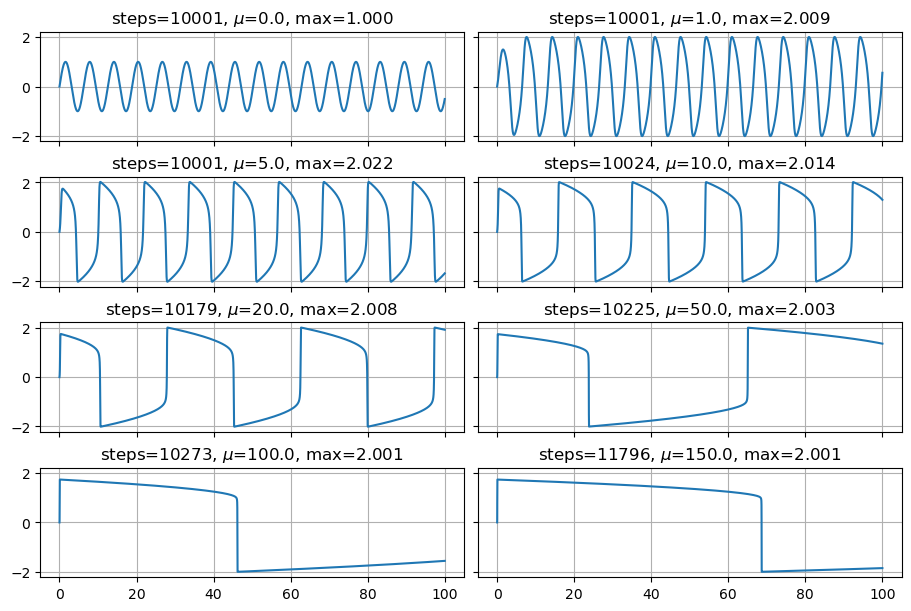

In [8]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=True)
for k in range(rows):
    for j in range(2):
        mu, r = res[2*k+j]
        axes[k, j].set_title(r"steps=%d, $\mu$=%.1f, max=%.3f" %
                (len(r), mu, max(abs(s[1]) for s in r)))
        axes[k, j].plot([s[0] for s in r], [s[1] for s in r])
        axes[k, j].grid()
show() if isShow else savefig('figVanderPolRK42.pdf')
close()

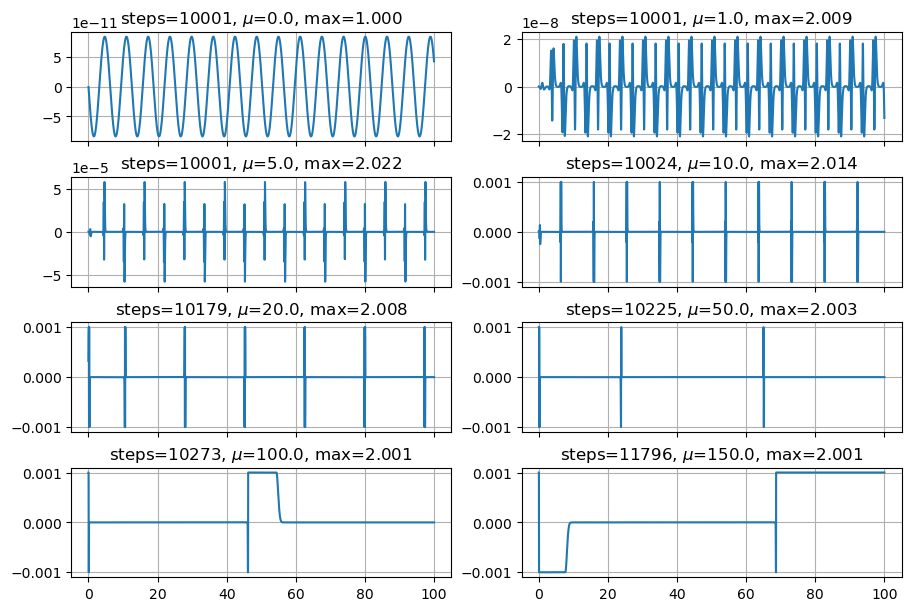

In [9]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=False)
for k in range(rows):
    for j in range(2):
        mu, r = res[2*k+j]
        axes[k, j].set_title(r"steps=%d, $\mu$=%.1f, max=%.3f" %
                (len(r), mu, max(abs(s[1]) for s in r)))
        axes[k, j].plot([s[0] for s in r[1:]], [s[3]**p*s[-1] for s in r[1:]])
        axes[k, j].grid()
show() if isShow else savefig('figVanderPolRK43.pdf')
close()

## GaussLegendre2

In [10]:
p = 2
def discrepancy(mu, y):
    return mu**3*(y[0]**6*y[1]/12 - y[0]**4*y[1]/4 + y[0]**2*y[1]/4 -\
    y[1]/12) + mu**2*(y[0]**5/12 - y[0]**3*y[1]**2/6 - y[0]**3/6 +\
    y[0]*y[1]**2/6 + y[0]/12) + mu*(-y[0]**2*y[1]/6 - y[1]**3/12 +\
    y[1]/6) - y[0]/12

In [11]:
x = arange(0., xk, h, dtype=float64)
res = []
for mu in mus:
    y = empty((len(x), 2), dtype=float64)
    y[0] = 0., 1.
    for i in range(1, len(x)):
        y[i] = GaussLegendre2(f, [mu], y[i-1], h)
        if abs(y[i][0]) >= 5.:
            break
    res.append((mu, i, y))
    print(mu, "%.2e" % (h**p*mu**(p+1)))
for mu, i, y in res:
    res_fix["GaussLegendre2", mu] = i, h**p*mu**(p+1), max(abs(y[:i, 0]))

0.0 0.00e+00
1.0 1.00e-04
5.0 1.25e-02
10.0 1.00e-01
20.0 8.00e-01
50.0 1.25e+01
100.0 1.00e+02
150.0 3.38e+02


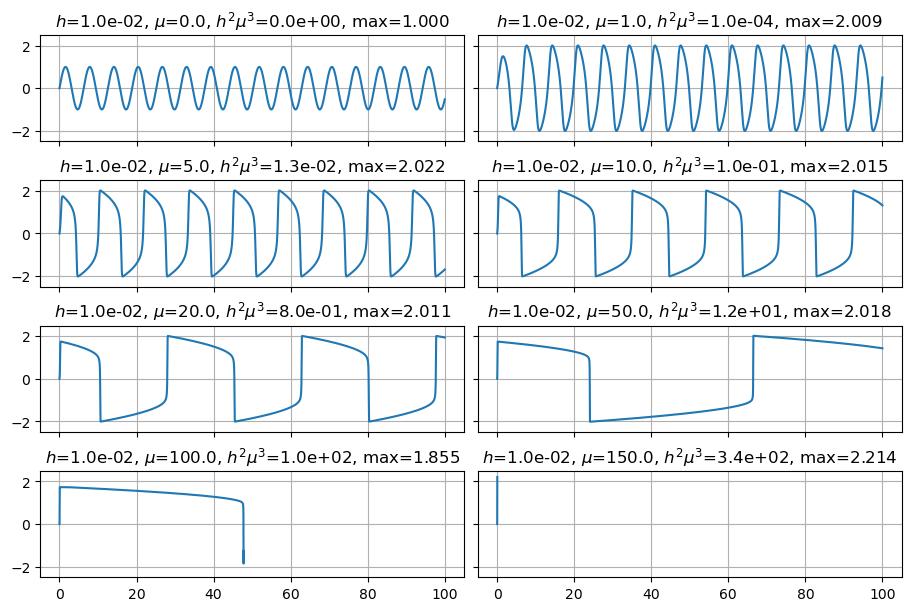

In [12]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=True)
for k in range(rows):
    for j in range(2):
        mu, i, y = res[2*k+j]
        axes[k, j].set_title(r"$h$=%.1e, $\mu$=%.1f, $h^%d\mu^%d$=%.1e, max=%.3f" %
                (h, mu, p, p+1, h**p*mu**(p+1), max(abs(y[:i, 0]))))
        axes[k, j].plot(x[:i], y[:i, 0])
        axes[k, j].grid()
        axes[k, j].set_ylim([-2.5, 2.5])
show() if isShow else savefig('figVanderPolGaussLegendre21.pdf')
close()

In [13]:
print("step =", xk//h)
res = []
for mu in mus:
    x, y = 0., empty(2, dtype=float64)
    y[:] = 0., 1.
    d, h1 = discrepancy(mu, y), h
    r = [(x, y[0], y[1], h1, d)]
    i = 0
    while x < xk:
        x += h1
        y = GaussLegendre2(f, [mu], y, h1)
        if abs(y[0]) >= 3.:
            break
        d = discrepancy(mu, y)
        h1 = min(h, (tol/(1 + abs(d)))**(1./p))
        r.append((x, y[0], y[1], h1, d))
        i += 1
    res.append((mu, r))
    print(mu)
for mu, r in res:
    res_steps["GaussLegendre2", mu] = len(r), max(abs(s[1]) for s in r)

step = 9999.0
0.0
1.0
5.0
10.0
20.0
50.0
100.0
150.0


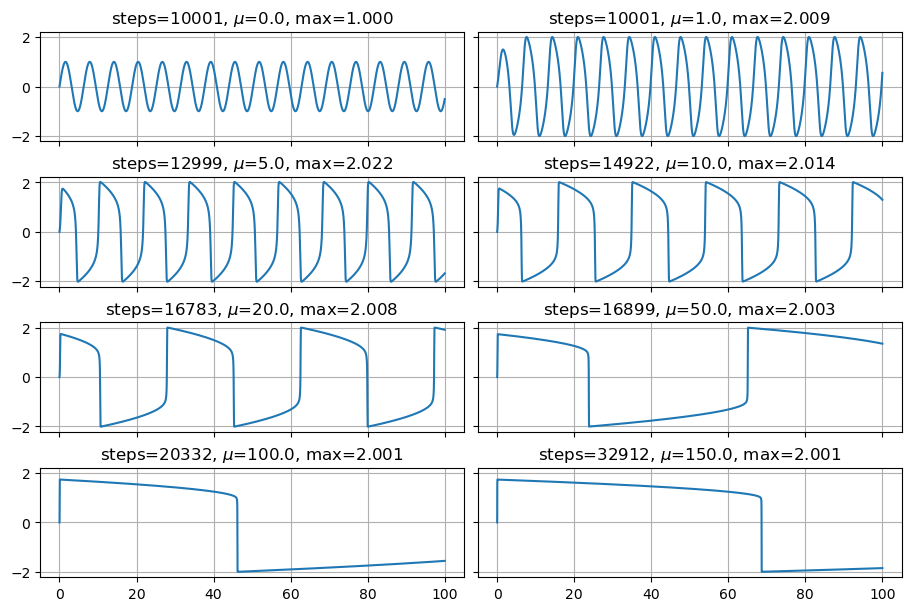

In [14]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=True)
for k in range(rows):
    for j in range(2):
        mu, r = res[2*k+j]
        axes[k, j].set_title(r"steps=%d, $\mu$=%.1f, max=%.3f" %
                (len(r), mu, max(abs(s[1]) for s in r)))
        axes[k, j].plot([s[0] for s in r], [s[1] for s in r])
        axes[k, j].grid()
show() if isShow else savefig('figVanderPolGaussLegendre22.pdf')
close()

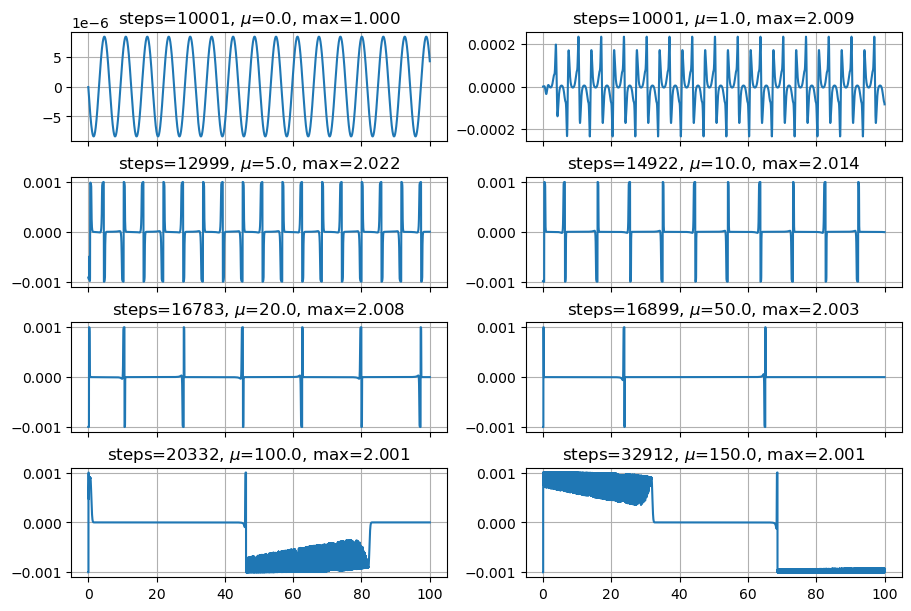

In [15]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=False)
for k in range(rows):
    for j in range(2):
        mu, r = res[2*k+j]
        axes[k, j].set_title(r"steps=%d, $\mu$=%.1f, max=%.3f" %
                (len(r), mu, max(abs(s[1]) for s in r)))
        axes[k, j].plot([s[0] for s in r[1:]], [s[3]**p*s[-1] for s in r[1:]])
        axes[k, j].grid()
show() if isShow else savefig('figVanderPolGaussLegendre23.pdf')
close()

## CrankNicolson2

In [16]:
p = 2
def discrepancy(mu, y):
    return mu**3*(y[0]**6*y[1]/12 - y[0]**4*y[1]/4 + y[0]**2*y[1]/4 -\
        y[1]/12) + mu**2*(y[0]**5/12 - 2*y[0]**3*y[1]**2/3 - y[0]**3/6 +\
        2*y[0]*y[1]**2/3 + y[0]/12) + mu*(-2*y[0]**2*y[1]/3 + y[1]**3/6 +\
        y[1]/6) - y[0]/12

In [17]:
x = arange(0., xk, h, dtype=float64)
res = []
for mu in mus:
    y = empty((len(x), 2), dtype=float64)
    y[0] = 0., 1.
    for i in range(1, len(x)):
        y[i] = CrankNicolson2(f, [mu], y[i-1], h)
        if abs(y[i][0]) >= 3.:
            break
    res.append((mu, i, y))
    print(mu, "%.2e" % (h**p*mu**(p+1)))
for mu, i, y in res:
    res_fix["CrankNicolson2", mu] = i, h**p*mu**(p+1), max(abs(y[:i, 0]))

0.0 0.00e+00
1.0 1.00e-04
5.0 1.25e-02
10.0 1.00e-01
20.0 8.00e-01
50.0 1.25e+01
100.0 1.00e+02
150.0 3.38e+02


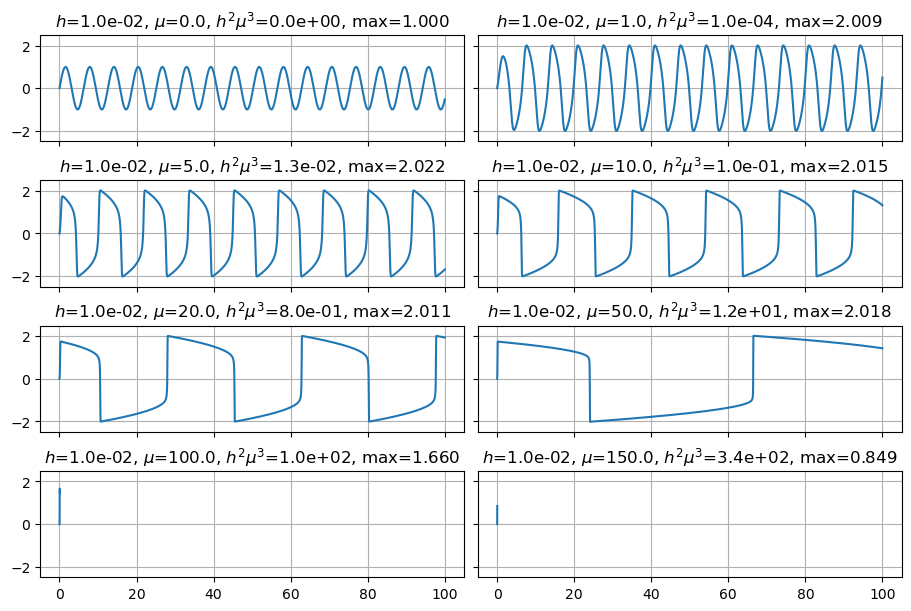

In [18]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=True)
for k in range(rows):
    for j in range(2):
        mu, i, y = res[2*k+j]
        axes[k, j].set_title(r"$h$=%.1e, $\mu$=%.1f, $h^%d\mu^%d$=%.1e, max=%.3f" %
                (h, mu, p, p+1, h**p*mu**(p+1), max(abs(y[:i, 0]))))
        axes[k, j].plot(x[:i], y[:i, 0])
        axes[k, j].grid()
        axes[k, j].set_ylim([-2.5, 2.5])
show() if isShow else savefig('figVanderPolCrankNicolson21.pdf')
close()

In [19]:
print("step =", xk//h)
res = []
for mu in mus:
    x, y = 0., empty(2, dtype=float64)
    y[:] = 0., 1.
    d, h1 = discrepancy(mu, y), h
    r = [(x, y[0], y[1], h1, d)]
    i = 0
    while x < xk:
        x += h1
        y = CrankNicolson2(f, [mu], y, h1)
        if abs(y[0]) >= 3.:
            break
        d = discrepancy(mu, y)
        h1 = min(h, (tol/(1 + abs(d)))**(1./p))
        r.append((x, y[0], y[1], h1, d))
        i += 1
    res.append((mu, r))
    print(mu)
for mu, r in res:
    res_steps["CrankNicolson2", mu] = len(r), max(abs(s[1]) for s in r)

step = 9999.0
0.0
1.0
5.0
10.0
20.0
50.0
100.0
150.0


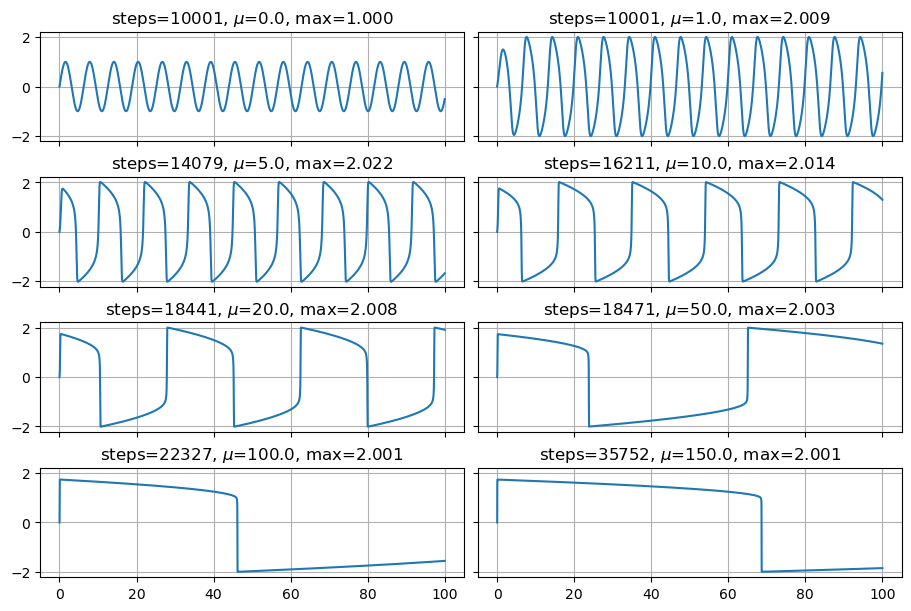

In [20]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=True)
for k in range(rows):
    for j in range(2):
        mu, r = res[2*k+j]
        axes[k, j].set_title(r"steps=%d, $\mu$=%.1f, max=%.3f" %
                (len(r), mu, max(abs(s[1]) for s in r)))
        axes[k, j].plot([s[0] for s in r], [s[1] for s in r])
        axes[k, j].grid()
show() if isShow else savefig('figVanderPolCrankNicolson22.pdf')
close()

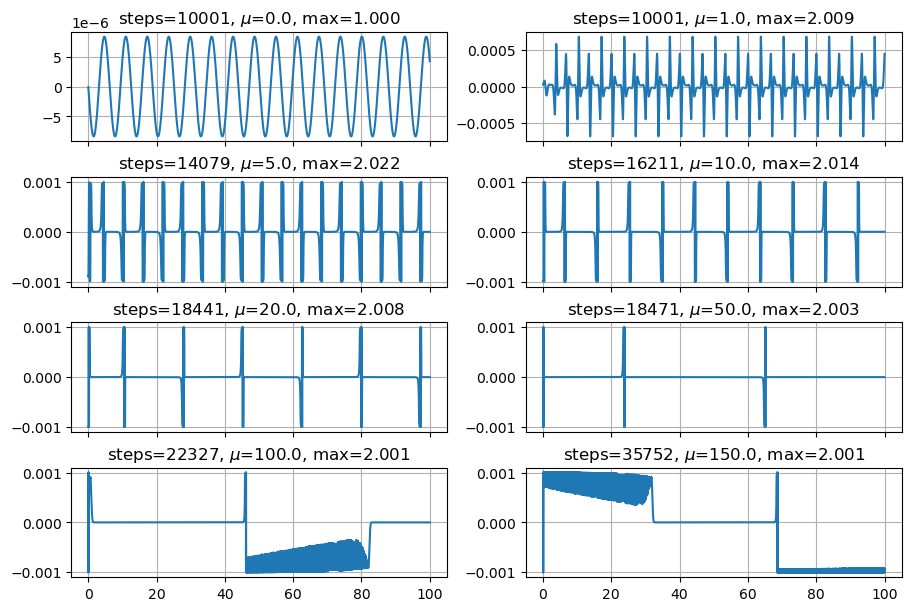

In [21]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=False)
for k in range(rows):
    for j in range(2):
        mu, r = res[2*k+j]
        axes[k, j].set_title(r"steps=%d, $\mu$=%.1f, max=%.3f" %
                (len(r), mu, max(abs(s[1]) for s in r)))
        axes[k, j].plot([s[0] for s in r[1:]], [s[3]**p*s[-1] for s in r[1:]])
        axes[k, j].grid()
show() if isShow else savefig('figVanderPolCrankNicolson23.pdf')
close()

## DormandPrince5

In [22]:
p = 5
def discrepancy(mu, y):
    return mu**6*(-y[0]**12*y[1]/3600 + y[0]**10*y[1]/600 -\
        y[0]**8*y[1]/240 + y[0]**6*y[1]/180 - y[0]**4*y[1]/240 +\
        y[0]**2*y[1]/600 - y[1]/3600) + mu**5*(-y[0]**11/3600 +\
        19*y[0]**9*y[1]**2/10800 + y[0]**9/720 - 19*y[0]**7*y[1]**2/2700 -\
        y[0]**7/360 + 19*y[0]**5*y[1]**2/1800 + y[0]**5/360 -\
        19*y[0]**3*y[1]**2/2700 - y[0]**3/720 + 19*y[0]*y[1]**2/10800 +\
        y[0]/3600) + mu**4*(23*y[0]**8*y[1]/10800 - 17*y[0]**6*y[1]**3/16200 -\
        7*y[0]**6*y[1]/900 + 7*y[0]**4*y[1]**3/4050 + 19*y[0]**4*y[1]/1800 -\
        y[0]**2*y[1]**3/3240 - 17*y[0]**2*y[1]/2700 - y[1]**3/2700 + y[1]/720) +\
        mu**3*(7*y[0]**7/10800 - 7*y[0]**5*y[1]**2/4320 - 13*y[0]**5/5400 -\
        37*y[0]**3*y[1]**4/16200 + 19*y[0]**3*y[1]**2/3600 + 31*y[0]**3/10800 +\
        37*y[0]*y[1]**4/16200 - 79*y[0]*y[1]**2/21600 - y[0]/900) +\
        mu**2*(-7*y[0]**4*y[1]/6480 - y[0]**2*y[1]**3/675 + 43*y[0]**2*y[1]/10800 +\
        y[1]**5/16200 + y[1]**3/900 - y[1]/600) + mu*(-y[0]**3/4320 +\
        y[0]*y[1]**2/2160 + y[0]/1200) + y[1]/3600

In [23]:
x = arange(0., xk, h, dtype=float64)
res = []
for mu in mus:
    y = empty((len(x), 2), dtype=float64)
    y[0] = 0., 1.
    for i in range(1, len(x)):
        y[i] = DormandPrince5(f, [mu], y[i-1], h)
        if abs(y[i][0]) >= 3.:
            break
    res.append((mu, i, y))
    print(mu, "%.2e" % (h**p*mu**(p+1)))
for mu, i, y in res:
    res_fix["DormandPrince5", mu] = i, h**p*mu**(p+1), max(abs(y[:i, 0]))

0.0 0.00e+00
1.0 1.00e-10
5.0 1.56e-06
10.0 1.00e-04
20.0 6.40e-03
50.0 1.56e+00
100.0 1.00e+02
150.0 1.14e+03


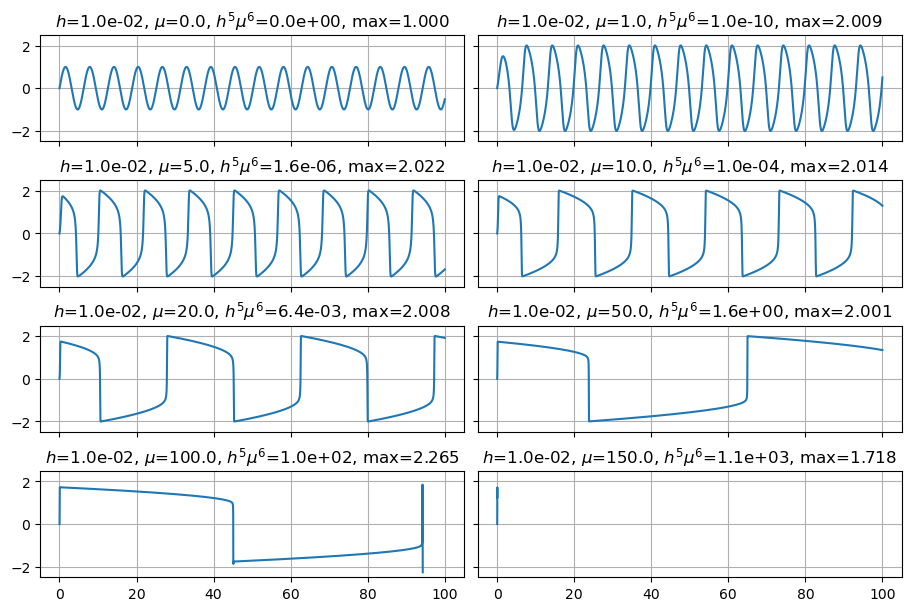

In [24]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=True)
for k in range(rows):
    for j in range(2):
        mu, i, y = res[2*k+j]
        axes[k, j].set_title(r"$h$=%.1e, $\mu$=%.1f, $h^%d\mu^%d$=%.1e, max=%.3f" %
                (h, mu, p, p+1, h**p*mu**(p+1), max(abs(y[:i, 0]))))
        axes[k, j].plot(x[:i], y[:i, 0])
        axes[k, j].grid()
        axes[k, j].set_ylim([-2.5, 2.5])
show() if isShow else savefig('figVanderPolDormandPrince51.pdf')
close()

In [25]:
print("step =", xk//h)
res = []
for mu in mus:
    x, y = 0., empty(2, dtype=float64)
    y[:] = 0., 1.
    d, h1 = discrepancy(mu, y), h
    r = [(x, y[0], y[1], h1, d)]
    i = 0
    while x < xk:
        x += h1
        y = DormandPrince5(f, [mu], y, h1)
        if abs(y[0]) >= 3.:
            break
        d = discrepancy(mu, y)
        h1 = min(h, (tol/(1 + abs(d)))**(1./p))
        r.append((x, y[0], y[1], h1, d))
        i += 1
    res.append((mu, r))
    print(mu)
for mu, r in res:
    res_steps["DormandPrince5", mu] = len(r), max(abs(s[1]) for s in r)

step = 9999.0
0.0
1.0
5.0
10.0
20.0
50.0
100.0
150.0


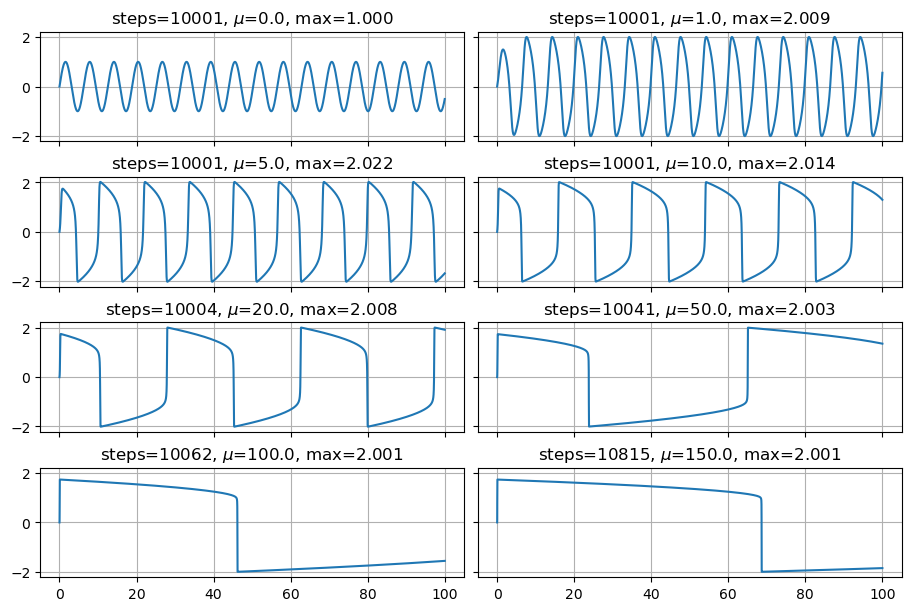

In [26]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=True)
for k in range(rows):
    for j in range(2):
        mu, r = res[2*k+j]
        axes[k, j].set_title(r"steps=%d, $\mu$=%.1f, max=%.3f" %
                (len(r), mu, max(abs(s[1]) for s in r)))
        axes[k, j].plot([s[0] for s in r], [s[1] for s in r])
        axes[k, j].grid()
show() if isShow else savefig('figVanderPolDormandPrince52.pdf')
close()

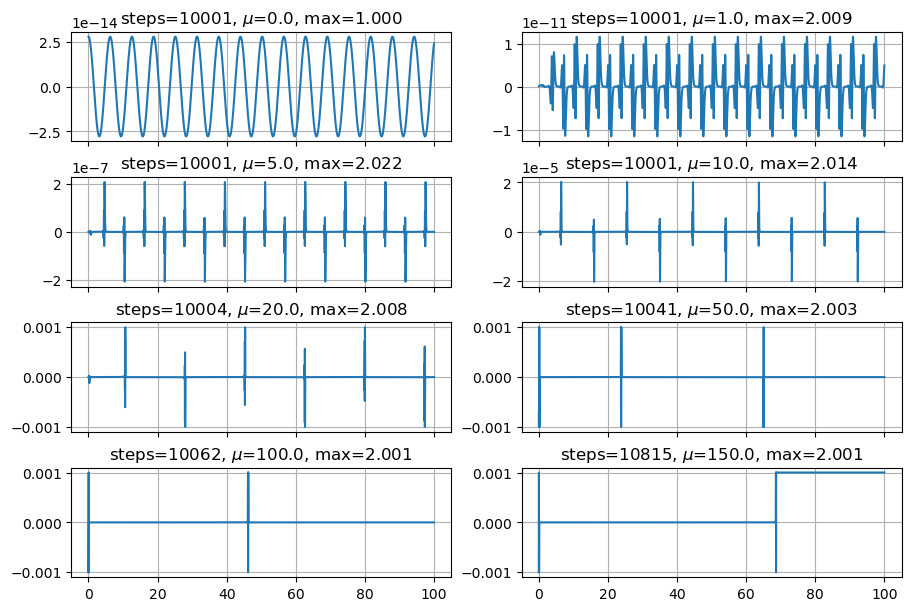

In [27]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=False)
for k in range(rows):
    for j in range(2):
        mu, r = res[2*k+j]
        axes[k, j].set_title(r"steps=%d, $\mu$=%.1f, max=%.3f" %
                (len(r), mu, max(abs(s[1]) for s in r)))
        axes[k, j].plot([s[0] for s in r[1:]], [s[3]**p*s[-1] for s in r[1:]])
        axes[k, j].grid()
show() if isShow else savefig('figVanderPolDormandPrince52.pdf')
close()

## AdamsBashforth4

In [29]:
p = 4

In [30]:
x = arange(0., xk, h, dtype=float64)
res = []
for mu in mus:
    y = empty((len(x), 2), dtype=float64)
    y[0] = 0., 1.
    for i in range(1, 4):
        y[i] = RK4(f, [mu], y[i-1], h)
        if abs(y[i][0]) >= 3.:
            break
    for i in range(4, len(x)):
        y[i] = AdamsBashforth4(f, [mu], y, h, i-1)
        if abs(y[i][0]) >= 3.:
            break
    res.append((mu, i, y))
    print(mu, "%.2e" % (h**p*mu**(p+1)))
for mu, i, y in res:
    res_fix["AdamsBashforth4", mu] = i, h**p*mu**(p+1), max(abs(y[:i, 0]))

0.0 0.00e+00
1.0 1.00e-08
5.0 3.13e-05
10.0 1.00e-03
20.0 3.20e-02
50.0 3.12e+00
100.0 1.00e+02
150.0 7.59e+02


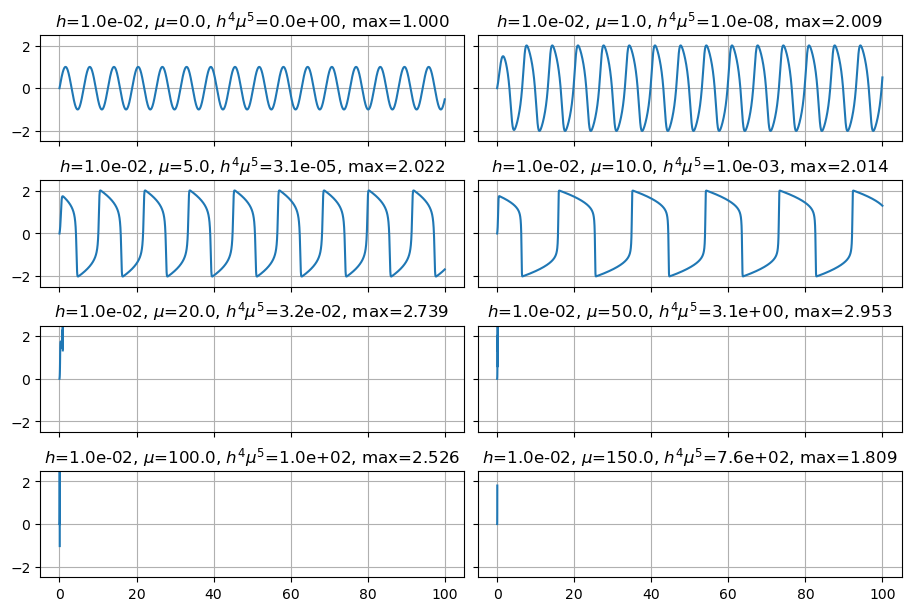

In [31]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=True)
for k in range(rows):
    for j in range(2):
        mu, i, y = res[2*k+j]
        axes[k, j].set_title(r"$h$=%.1e, $\mu$=%.1f, $h^%d\mu^%d$=%.1e, max=%.3f" %
                (h, mu, p, p+1, h**p*mu**(p+1), max(abs(y[:i, 0]))))
        axes[k, j].plot(x[:i], y[:i, 0])
        axes[k, j].grid()
        axes[k, j].set_ylim([-2.5, 2.5])
show() if isShow else savefig('figVanderPolAdamsBashforth41.pdf')
close()

## AdamsBashforth5

In [32]:
p = 5

In [33]:
x = arange(0., xk, h, dtype=float64)
res = []
for mu in mus:
    y = empty((len(x), 2), dtype=float64)
    y[0] = 0., 1.
    for i in range(1, 5):
        y[i] = DormandPrince5(f, [mu], y[i-1], h)
        if abs(y[i][0]) >= 3.:
            break
    for i in range(5, len(x)):
        y[i] = AdamsBashforth5(f, [mu], y, h, i-1)
        if abs(y[i][0]) >= 3.:
            break
    res.append((mu, i, y))
    print(mu, "%.2e" % (h**p*mu**(p+1)))
for mu, i, y in res:
    res_fix["AdamsBashforth5", mu] = i, h**p*mu**(p+1), max(abs(y[:i, 0]))

0.0 0.00e+00
1.0 1.00e-10
5.0 1.56e-06
10.0 1.00e-04
20.0 6.40e-03
50.0 1.56e+00
100.0 1.00e+02
150.0 1.14e+03


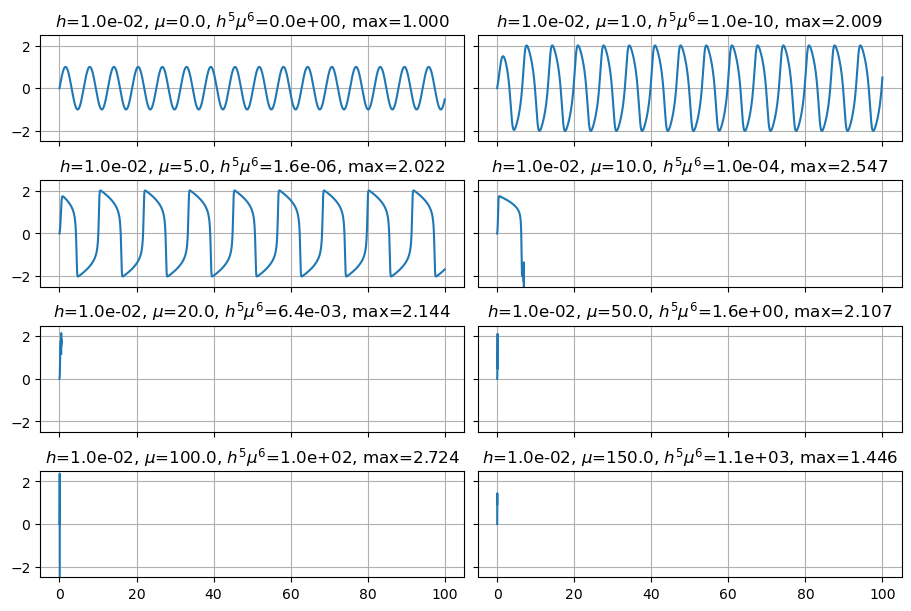

In [34]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=True)
for k in range(rows):
    for j in range(2):
        mu, i, y = res[2*k+j]
        axes[k, j].set_title(r"$h$=%.1e, $\mu$=%.1f, $h^%d\mu^%d$=%.1e, max=%.3f" %
                (h, mu, p, p+1, h**p*mu**(p+1), max(abs(y[:i, 0]))))
        axes[k, j].plot(x[:i], y[:i, 0])
        axes[k, j].grid()
        axes[k, j].set_ylim([-2.5, 2.5])
show() if isShow else savefig('figVanderPolAdamsBashforth51.pdf')
close()

## AdamsMoulton4

In [35]:
p = 4

In [36]:
x = arange(0., xk, h, dtype=float64)
res = []
for mu in mus:
    y = empty((len(x), 2), dtype=float64)
    y[0] = 0., 1.
    for i in range(1, 4):
        y[i] = RK4(f, [mu], y[i-1], h)
        if abs(y[i][0]) >= 3.:
            break
    for i in range(4, len(x)):
        y[i] = AdamsMoulton4(f, [mu], y, h, i)
        if abs(y[i][0]) >= 3.:
            break
    res.append((mu, i, y))
    print(mu, "%.2e" % (h**p*mu**(p+1)))
for mu, i, y in res:
    res_fix["AdamsMoulton4", mu] = i, h**p*mu**(p+1), max(abs(y[:i, 0]))

0.0 0.00e+00
1.0 1.00e-08
5.0 3.13e-05
10.0 1.00e-03
20.0 3.20e-02
50.0 3.12e+00
100.0 1.00e+02
150.0 7.59e+02


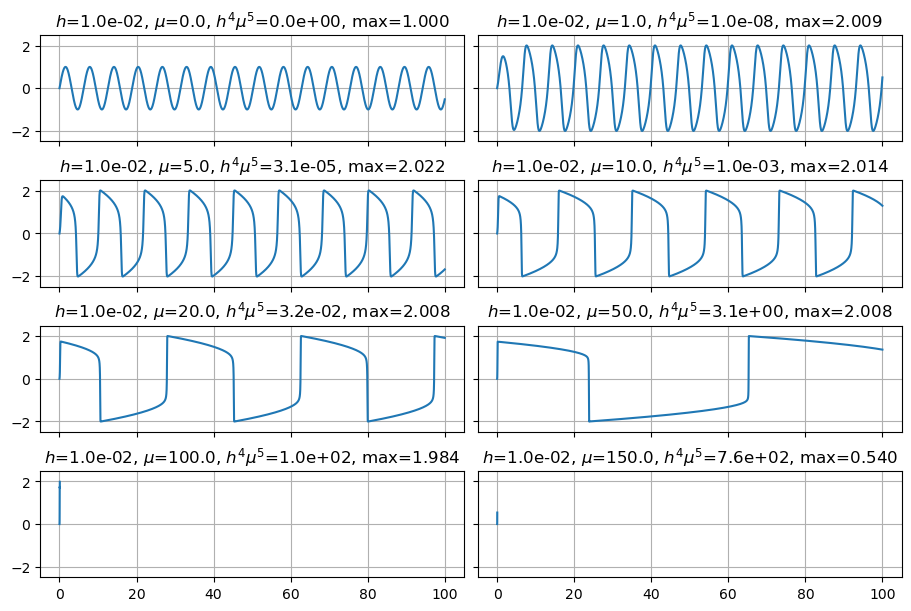

In [37]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=True)
for k in range(rows):
    for j in range(2):
        mu, i, y = res[2*k+j]
        axes[k, j].set_title(r"$h$=%.1e, $\mu$=%.1f, $h^%d\mu^%d$=%.1e, max=%.3f" %
                (h, mu, p, p+1, h**p*mu**(p+1), max(abs(y[:i, 0]))))
        axes[k, j].plot(x[:i], y[:i, 0])
        axes[k, j].grid()
        axes[k, j].set_ylim([-2.5, 2.5])
show() if isShow else savefig('figVanderPolAdamsBashforth51.pdf')
close()

## AdamsMoulton5

In [38]:
p = 5

In [39]:
x = arange(0., xk, h, dtype=float64)
res = []
for mu in mus:
    y = empty((len(x), 2), dtype=float64)
    y[0] = 0., 1.
    for i in range(1, 5):
        y[i] = DormandPrince5(f, [mu], y[i-1], h)
        if abs(y[i][0]) >= 3.:
            break
    for i in range(5, len(x)):
        y[i] = AdamsMoulton5(f, [mu], y, h, i)
        if abs(y[i][0]) >= 3.:
            break
    res.append((mu, i, y))
    print(mu, "%.2e" % (h**p*mu**(p+1)))
for mu, i, y in res:
    res_fix["AdamsMoulton5", mu] = i, h**p*mu**(p+1), max(abs(y[:i, 0]))

0.0 0.00e+00
1.0 1.00e-10
5.0 1.56e-06
10.0 1.00e-04
20.0 6.40e-03
50.0 1.56e+00
100.0 1.00e+02
150.0 1.14e+03


/tmp/ipykernel_14465/2297613886.py:5: RuntimeWarning: overflow encountered in scalar multiply
  -mu*(y[0]**2 - 1)*y[1] - y[0],\


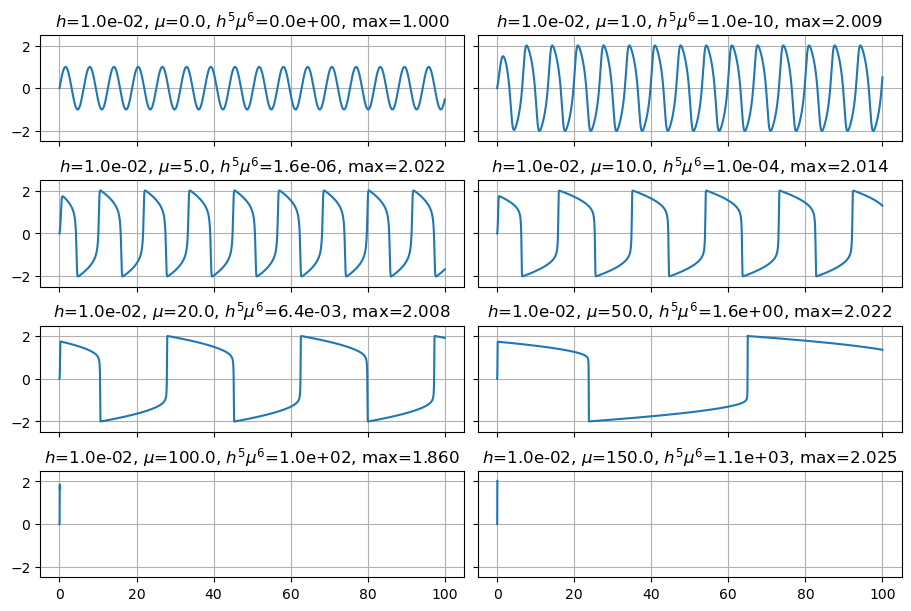

In [40]:
rows = len(res)//2
fig, axes = subplots(figsize=(9, rows*1.5), nrows = rows, ncols = 2,\
        layout='constrained', sharex=True, sharey=True)
for k in range(rows):
    for j in range(2):
        mu, i, y = res[2*k+j]
        axes[k, j].set_title(r"$h$=%.1e, $\mu$=%.1f, $h^%d\mu^%d$=%.1e, max=%.3f" %
                (h, mu, p, p+1, h**p*mu**(p+1), max(abs(y[:i, 0]))))
        axes[k, j].plot(x[:i], y[:i, 0])
        axes[k, j].grid()
        axes[k, j].set_ylim([-2.5, 2.5])
show() if isShow else savefig('figVanderPolAdamsMoulton51.pdf')
close()

In [41]:
res_fix

{('RK4', 0.0): (9999, 0.0, 0.999999995756644),
 ('RK4', 1.0): (9999, 1e-08, 2.0086195745621724),
 ('RK4', 5.0): (9999, 3.125e-05, 2.0215081459180873),
 ('RK4', 10.0): (9999, 0.001, 2.014287001497079),
 ('RK4', 20.0): (9999, 0.032, 2.0078150429131667),
 ('RK4', 50.0): (9999, 3.125, 2.003816122934855),
 ('RK4', 100.0): (4653, 100.0, 3.0645785151263887),
 ('RK4', 150.0): (9, 759.375, 1.8241766051940407),
 ('GaussLegendre2', 0.0): (9999, 0.0, 0.9999999986696234),
 ('GaussLegendre2', 1.0): (9999, 0.0001, 2.008659956502125),
 ('GaussLegendre2', 5.0): (9999, 0.0125, 2.0217710839553735),
 ('GaussLegendre2', 10.0): (9999, 0.1, 2.0150655601618235),
 ('GaussLegendre2', 20.0): (9999, 0.8, 2.010575803277316),
 ('GaussLegendre2', 50.0): (9999, 12.5, 2.018338240216302),
 ('GaussLegendre2', 100.0): (4779, 100.0, 1.8554291649528065),
 ('GaussLegendre2', 150.0): (5, 337.5, 2.2141769011083032),
 ('CrankNicolson2', 0.0): (9999, 0.0, 0.9999999986696234),
 ('CrankNicolson2', 1.0): (9999, 0.0001, 2.008634847

In [42]:
res_steps

{('RK4', 0.0): (10001, 0.999999995756644),
 ('RK4', 1.0): (10001, 2.0086195745621724),
 ('RK4', 5.0): (10001, 2.0215081459180873),
 ('RK4', 10.0): (10024, 2.0142851232602843),
 ('RK4', 20.0): (10179, 2.007800334790241),
 ('RK4', 50.0): (10225, 2.0029562539617545),
 ('RK4', 100.0): (10273, 2.001318864936709),
 ('RK4', 150.0): (11796, 2.0008071446938103),
 ('GaussLegendre2', 0.0): (10001, 0.9999999986696234),
 ('GaussLegendre2', 1.0): (10001, 2.008659956502125),
 ('GaussLegendre2', 5.0): (12999, 2.021532159785094),
 ('GaussLegendre2', 10.0): (14922, 2.014290673872817),
 ('GaussLegendre2', 20.0): (16783, 2.007791317453634),
 ('GaussLegendre2', 50.0): (16899, 2.0029558489827965),
 ('GaussLegendre2', 100.0): (20332, 2.001318514765396),
 ('GaussLegendre2', 150.0): (32912, 2.0008068208564938),
 ('CrankNicolson2', 0.0): (10001, 0.9999999986696234),
 ('CrankNicolson2', 1.0): (10001, 2.008634847910568),
 ('CrankNicolson2', 5.0): (14079, 2.0215383381324),
 ('CrankNicolson2', 10.0): (16211, 2.0144

In [61]:
lst = ['GaussLegendre2', 'CrankNicolson2', 'RK4', 'DormandPrince5',\
       'AdamsBashforth4', 'AdamsMoulton4', 'AdamsBashforth5', 'AdamsMoulton5']
lstn = ['Гаусса-Лежандра 2', 'Кранка-Николса 2', 'Рунге-Кутты 4', 'Дормана-Принса 5',\
       'Адамса-Башфорта 4', 'Адамса-Мультона 4', 'Адамса-Башфорта 5', 'Адамса-Мультона 5']

In [62]:
for i in range(0, 8, 2):
    print(r"\multicolumn{3}{|c|}{%s} & \multicolumn{3}{c|}{%s} \\ \hline" % (lstn[i], lstn[i+1]))
    for mu in mus:
        s, p, e = res_fix[lst[i], mu]
        print(r"%.0f & %.2e & %s &" % (mu, p, "%.3f" % e if s > 100 else "*"))
        s, p, e = res_fix[lst[i+1], mu]
        print(r"%.0f & %.2e & %s \\ \hline" % (mu, p, "%.3f" % e if s > 100 else "*"))        

\multicolumn{3}{|c|}{Гаусса-Лежандра 2} & \multicolumn{3}{c|}{Кранка-Николса 2} \\ \hline
0 & 0.00e+00 & 1.000 &
0 & 0.00e+00 & 1.000 \\ \hline
1 & 1.00e-04 & 2.009 &
1 & 1.00e-04 & 2.009 \\ \hline
5 & 1.25e-02 & 2.022 &
5 & 1.25e-02 & 2.022 \\ \hline
10 & 1.00e-01 & 2.015 &
10 & 1.00e-01 & 2.015 \\ \hline
20 & 8.00e-01 & 2.011 &
20 & 8.00e-01 & 2.011 \\ \hline
50 & 1.25e+01 & 2.018 &
50 & 1.25e+01 & 2.018 \\ \hline
100 & 1.00e+02 & 1.855 &
100 & 1.00e+02 & * \\ \hline
150 & 3.38e+02 & * &
150 & 3.38e+02 & * \\ \hline
\multicolumn{3}{|c|}{Рунге-Кутты 4} & \multicolumn{3}{c|}{Дормана-Принса 5} \\ \hline
0 & 0.00e+00 & 1.000 &
0 & 0.00e+00 & 1.000 \\ \hline
1 & 1.00e-08 & 2.009 &
1 & 1.00e-10 & 2.009 \\ \hline
5 & 3.13e-05 & 2.022 &
5 & 1.56e-06 & 2.022 \\ \hline
10 & 1.00e-03 & 2.014 &
10 & 1.00e-04 & 2.014 \\ \hline
20 & 3.20e-02 & 2.008 &
20 & 6.40e-03 & 2.008 \\ \hline
50 & 3.12e+00 & 2.004 &
50 & 1.56e+00 & 2.001 \\ \hline
100 & 1.00e+02 & 3.065 &
100 & 1.00e+02 & 2.265 \\ \hline
15

In [65]:
for i in range(0, 4, 2):
    print(r"\multicolumn{3}{|c|}{%s} & \multicolumn{3}{c|}{%s} \\ \hline" % (lstn[i], lstn[i+1]))
    for mu in mus:
        s, p = res_steps[lst[i], mu]
        print(r"%.0f & %d & %.3f &" % (mu, s, p))
        s, p = res_steps[lst[i+1], mu]
        print(r"%.0f & %d & %.3f \\ \hline" % (mu, s, p))

\multicolumn{3}{|c|}{Гаусса-Лежандра 2} & \multicolumn{3}{c|}{Кранка-Николса 2} \\ \hline
0 & 10001 & 1.000 &
0 & 10001 & 1.000 \\ \hline
1 & 10001 & 2.009 &
1 & 10001 & 2.009 \\ \hline
5 & 12999 & 2.022 &
5 & 14079 & 2.022 \\ \hline
10 & 14922 & 2.014 &
10 & 16211 & 2.014 \\ \hline
20 & 16783 & 2.008 &
20 & 18441 & 2.008 \\ \hline
50 & 16899 & 2.003 &
50 & 18471 & 2.003 \\ \hline
100 & 20332 & 2.001 &
100 & 22327 & 2.001 \\ \hline
150 & 32912 & 2.001 &
150 & 35752 & 2.001 \\ \hline
\multicolumn{3}{|c|}{Рунге-Кутты 4} & \multicolumn{3}{c|}{Дормана-Принса 5} \\ \hline
0 & 10001 & 1.000 &
0 & 10001 & 1.000 \\ \hline
1 & 10001 & 2.009 &
1 & 10001 & 2.009 \\ \hline
5 & 10001 & 2.022 &
5 & 10001 & 2.022 \\ \hline
10 & 10024 & 2.014 &
10 & 10001 & 2.014 \\ \hline
20 & 10179 & 2.008 &
20 & 10004 & 2.008 \\ \hline
50 & 10225 & 2.003 &
50 & 10041 & 2.003 \\ \hline
100 & 10273 & 2.001 &
100 & 10062 & 2.001 \\ \hline
150 & 11796 & 2.001 &
150 & 10815 & 2.001 \\ \hline
